# Linear Regression on the Boston Housing Dataset

#### In this project, I will be creating Linear Regression models of the Boston Housing Dataset. I will implement:
* simple linear regression manually (both before and after removing outliers)
* simple linear regression with scikit-learn
* multiple linear regression manually (with scikit-learn for the simple linear regression portions)
* multiple linear regression entirely with scikit-learn

## Used Packages & Imported Data:

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import math

# import data from csv file
data = pd.read_csv('data/bostonhousing.csv')
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,5.33,36.2


## Good Practices

Run the cell below before you run the rest of the program. Before preprocessing any of the data, you should check for NaN (missing) values and replace them with other values, such as the mean, median or mode (but NEVER delete the entry, unless most of it [> 50.0%] is missing).

Then, you should remove outliers, by checking them with a formula such as the interquartile Range (IQR) formula, although we will run simple linear regression both before and after removing outliers.

In [2]:
def replace_missing(df):
    # numeric columns
    for col in df.select_dtypes(include=['number']):
        df[col].fillna(df[col].median(), inplace=True)
    # categorical columns - not utilized here
    for col in df.select_dtypes(include=['object']):
        df[col].fillna(df[col].mode()[0], inplace=True)
    
def replace_outliers(df):
    for col in df.select_dtypes(include=['number']):
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        Q1 -= 1.5 * IQR
        Q3 += 1.5 * IQR
        df.loc[df[col] < Q1, col] = Q1
        df.loc[df[col] > Q3, col] = Q3        

In [3]:
replace_outliers(data)
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,5.33,36.2


## Manual Implementation of Simple Linear Regression

In order to manually implement simple linear regression, you need to find the slope and slope-intercept of the line of best fit, and to do that, you need the standard deviations of the original lists of x-values and y-values, and the correlation coefficient given the lists of x-values and y-values.

### Manual Implementation Prerequisites

Run the cell below before you run the rest of the program. In order for the code to manually implement simple linear regression to work, the functions to provide the program with the predicted values using the standard deviation and correlation coefficient formulas need to be implemented.

In [4]:
# Finds the predicted values given list of x-values and list of y-values
# Parameter: x_values, a list; y_values, a list
# Precondition: x_values and y_values are lists of solely numeric values
# Return: returns the predicted values
# Postcondition: Returned value must be a numeric value
def find_predicted(x_values, y_values):
    slope = find_r(x_values, y_values) * find_stdev(y_values) / find_stdev(x_values)
    intercept = np.mean(y_values) - np.mean(x_values) * slope
    return x_values * slope + intercept

# Finds the standard deviation in a list of numbers
# Parameter: values, a list
# Precondition: values is a list of solely numeric values
# Return: returns the average of all of the numbers in values
# Postcondition: Returned value must be a numeric value
def find_stdev(values):
    vals = (values - np.mean(values)) ** 2
    s = np.sum(vals)
    return math.sqrt(s / (len(vals) - 1))

# Finds the correlation coefficient r given list of x-values and list of y-values
# Parameter: x_values, a list; y_values, a list
# Precondition: x_values and y_values are lists of solely numeric values
# Return: returns the correlation coefficient value
# Postcondition: Returned value must be a numeric value
def find_r(x_values, y_values):
    x_vals = x_values - np.mean(x_values)
    y_vals = y_values - np.mean(y_values)
    numerator = np.sum(x_vals * y_vals)
    denominator = math.sqrt(np.sum(x_vals ** 2) * np.sum(y_vals ** 2))
    return numerator / denominator

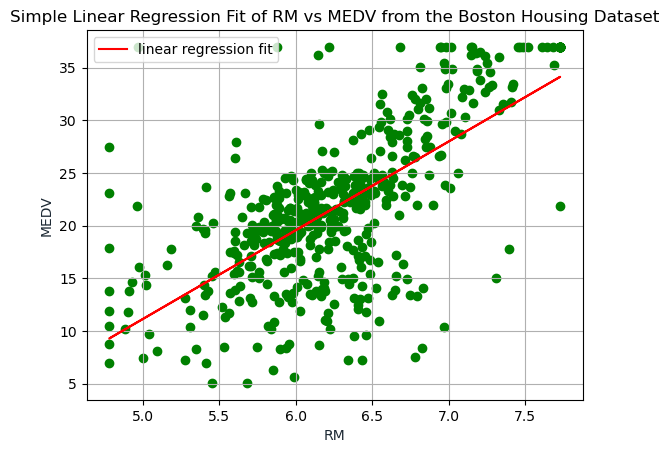

In [5]:
# establish RM and MEDV as independent and dependent variables
x_values = data['RM']
y_values = data['MEDV']

# find predicted values
predicted_values = find_predicted(x_values, y_values)

# plot scatterplot of original points
plt.scatter(x_values, y_values, color='g')

# plot linear regression model
plt.plot(x_values, predicted_values, '-r', label='linear regression fit')

# graph details, and display
plt.title('Simple Linear Regression Fit of RM vs MEDV from the Boston Housing Dataset')
plt.xlabel('RM', color='#1C2833')
plt.ylabel('MEDV', color='#1C2833')
plt.legend(loc='upper left')
plt.grid()
plt.show()